In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

## Data Visualization 

In [3]:
# Define list of Continuous columns Names
continuous = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

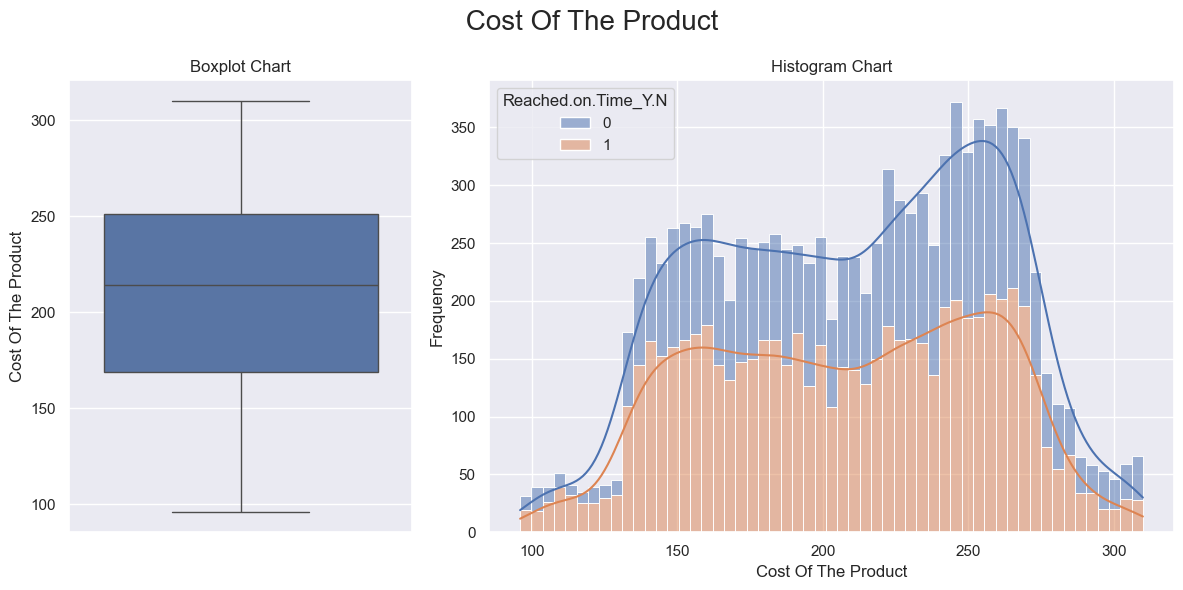

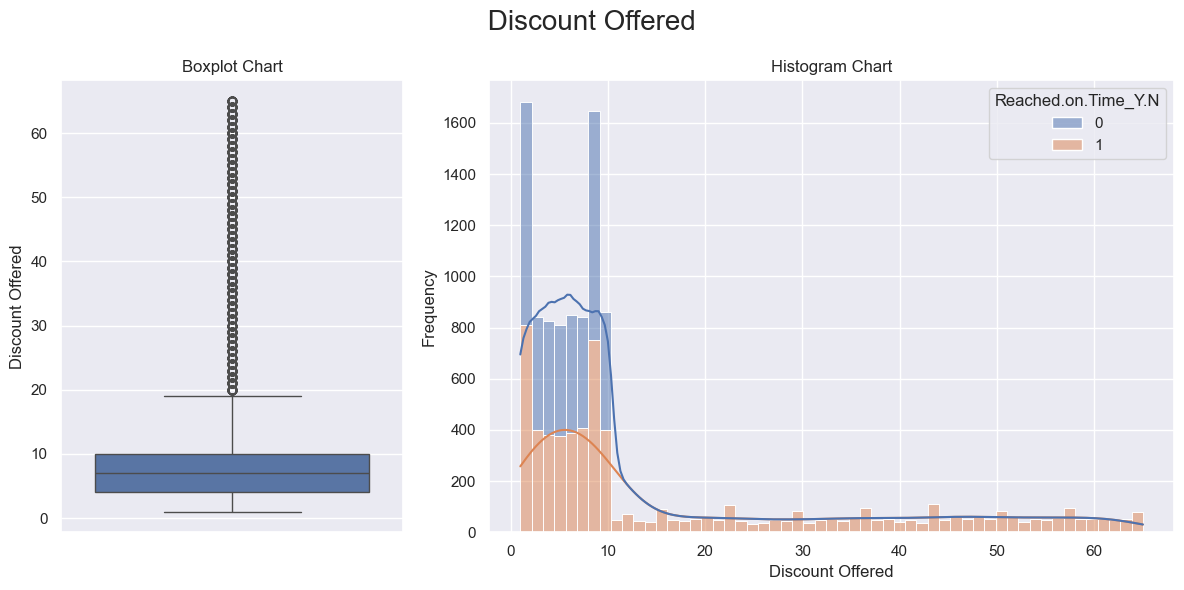

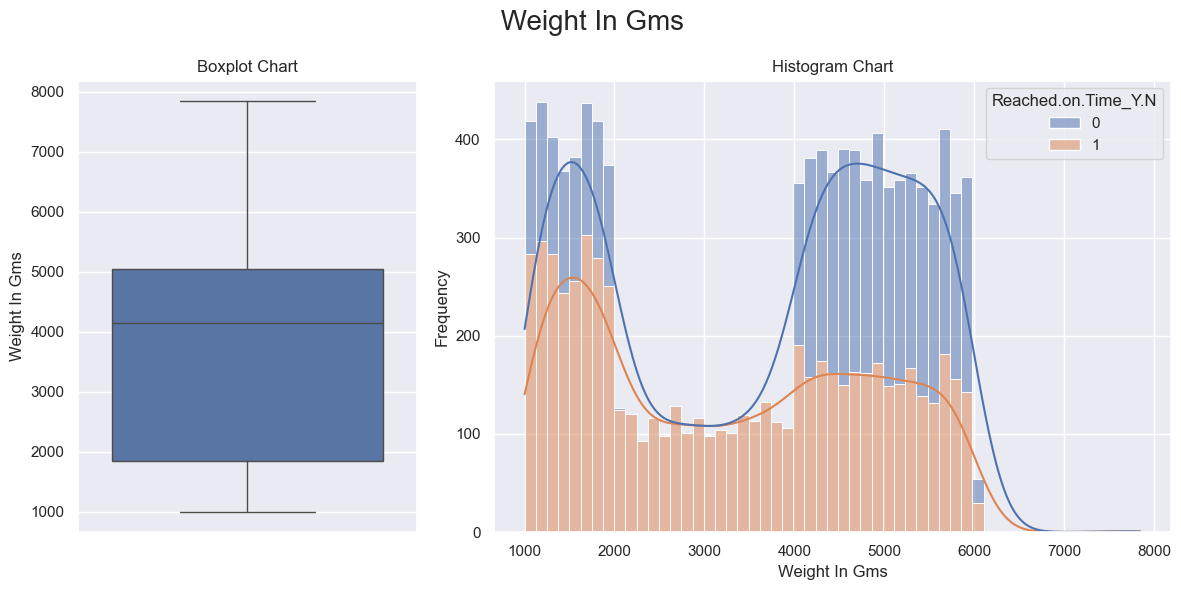

In [4]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Reached.on.Time_Y.N')    

In [5]:
# Define list Name of Categorical columns 
categorical = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating', 'Reached.on.Time_Y.N']

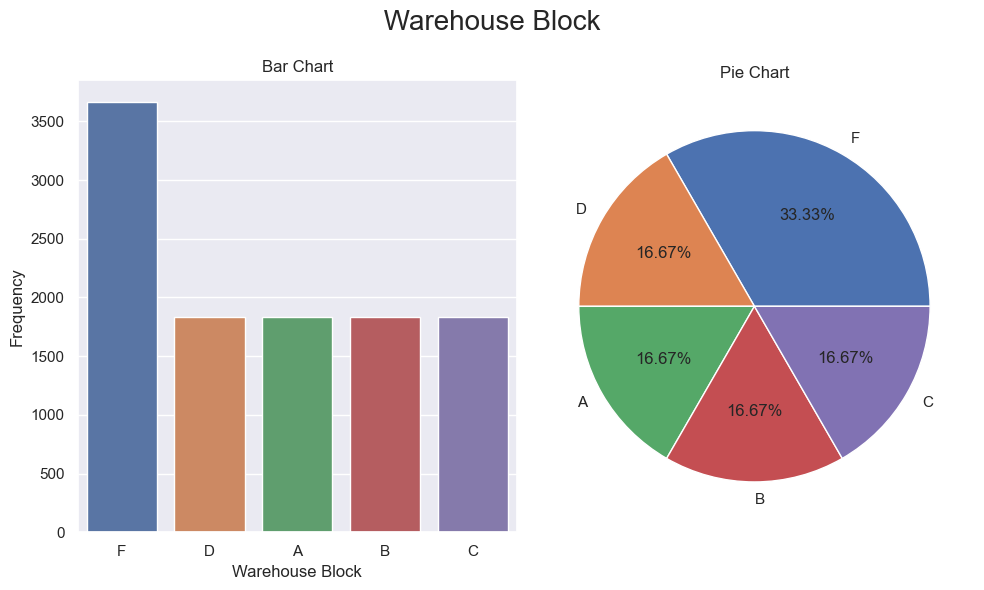

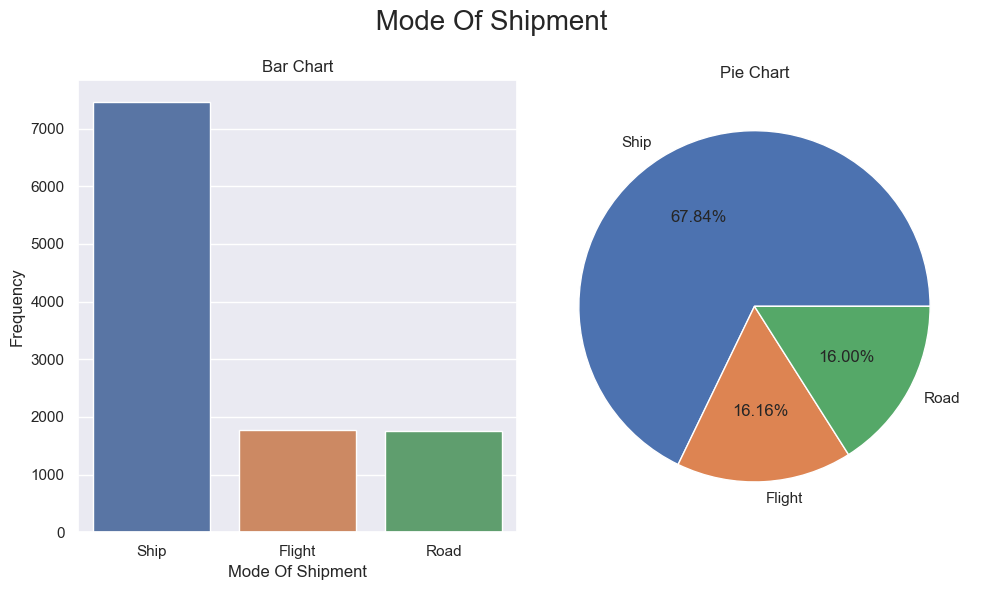

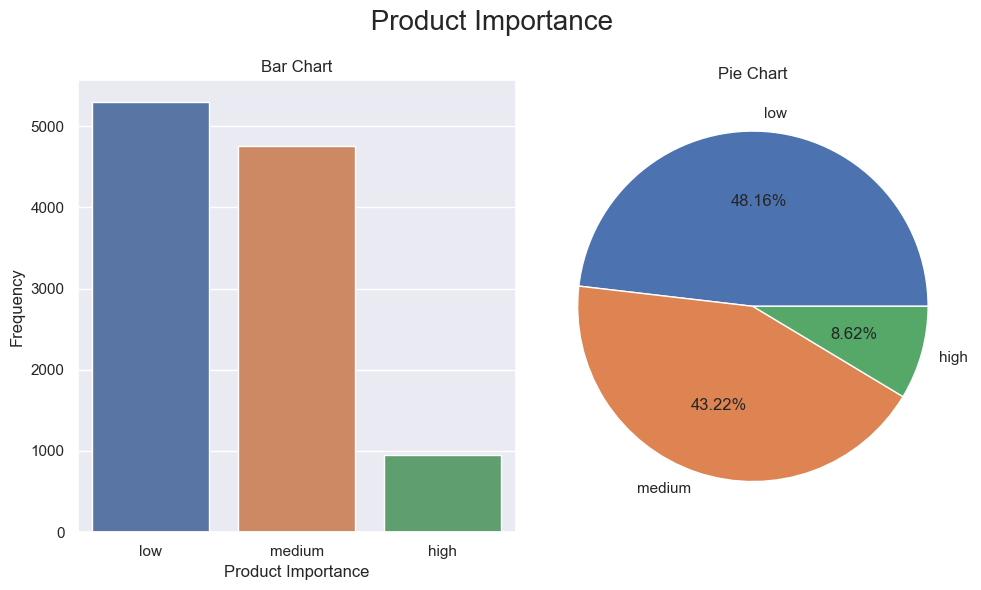

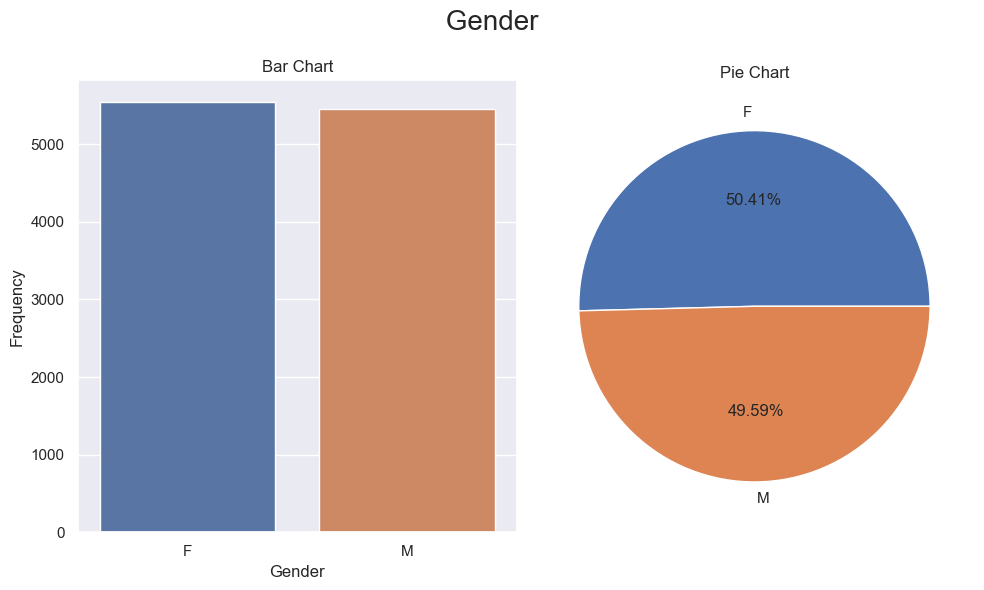

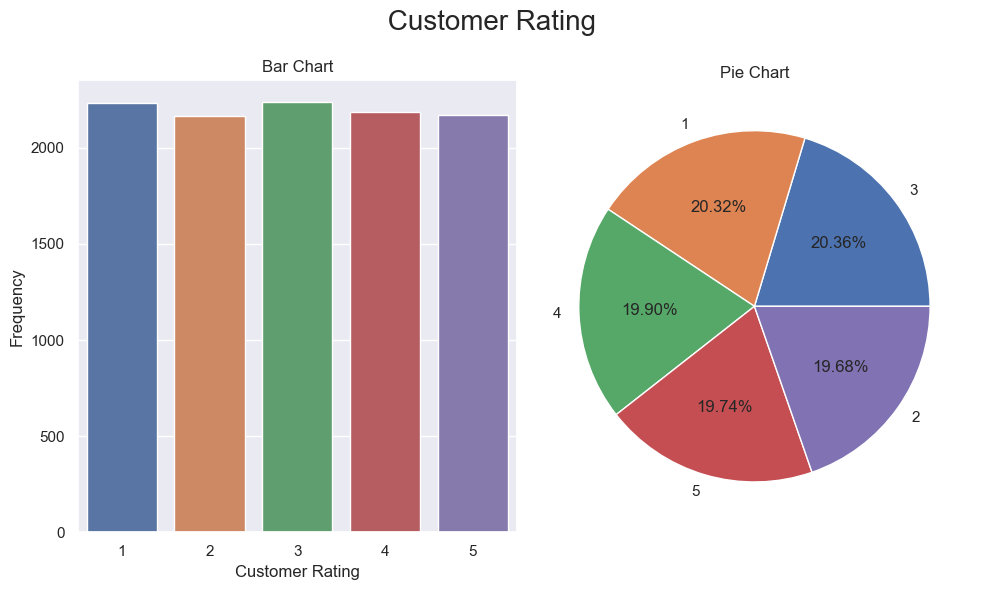

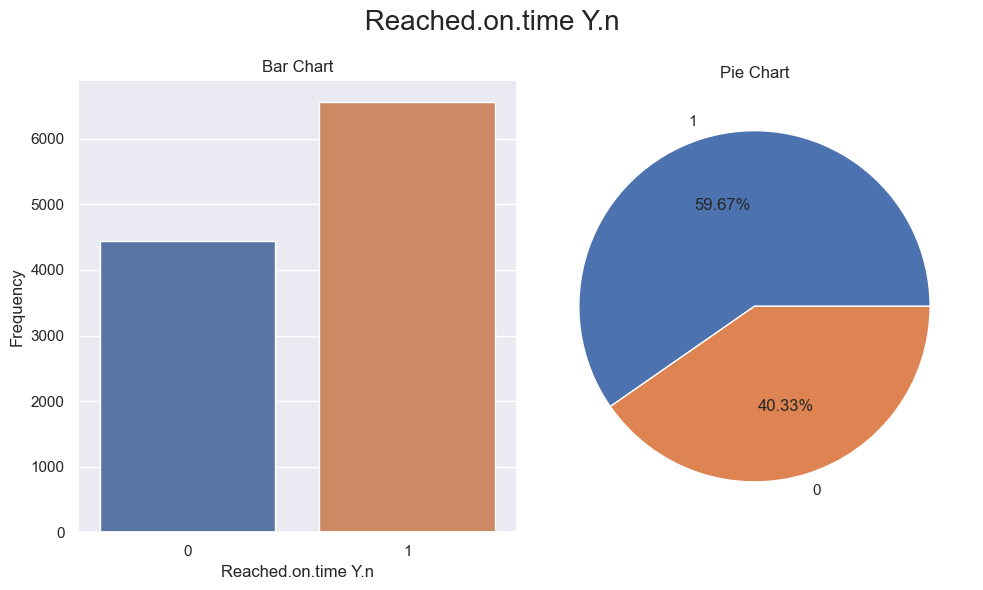

In [6]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

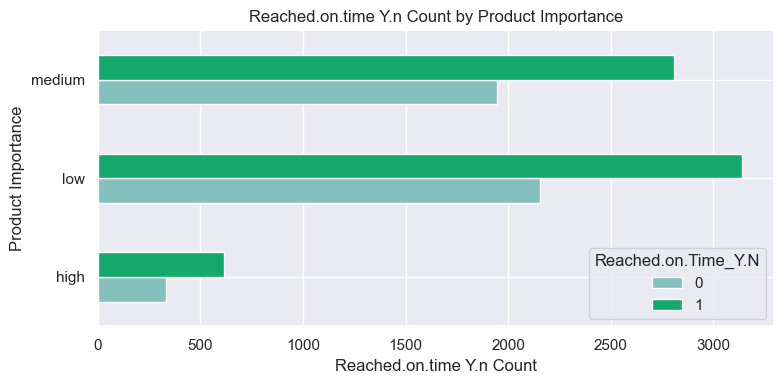

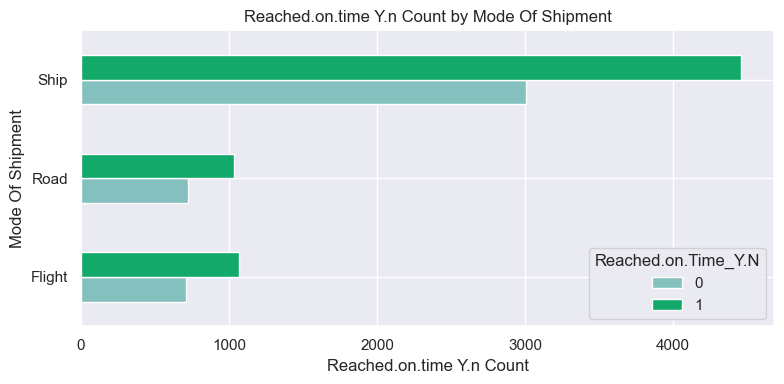

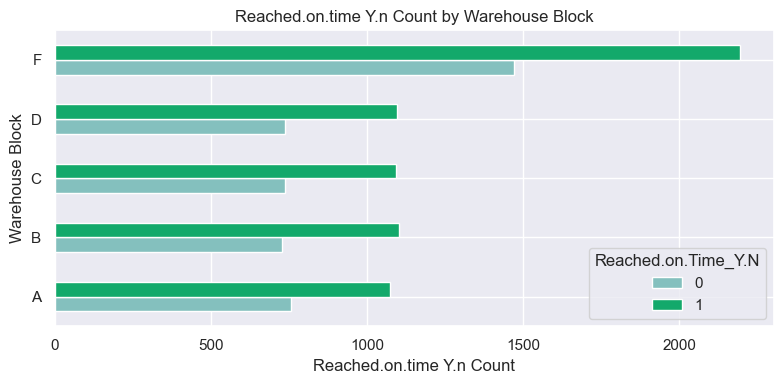

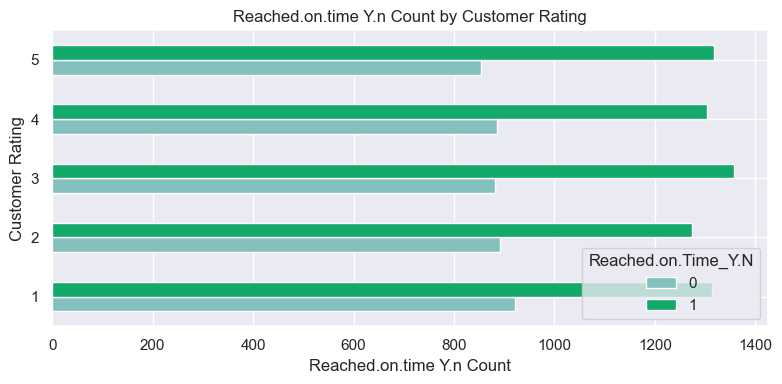

In [7]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#84c0be', '#13a96b'], figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

bar_plot('Product_importance', 'Reached.on.Time_Y.N', df)
bar_plot('Mode_of_Shipment', 'Reached.on.Time_Y.N', df)
bar_plot('Warehouse_block', 'Reached.on.Time_Y.N', df)
bar_plot('Customer_rating', 'Reached.on.Time_Y.N', df)

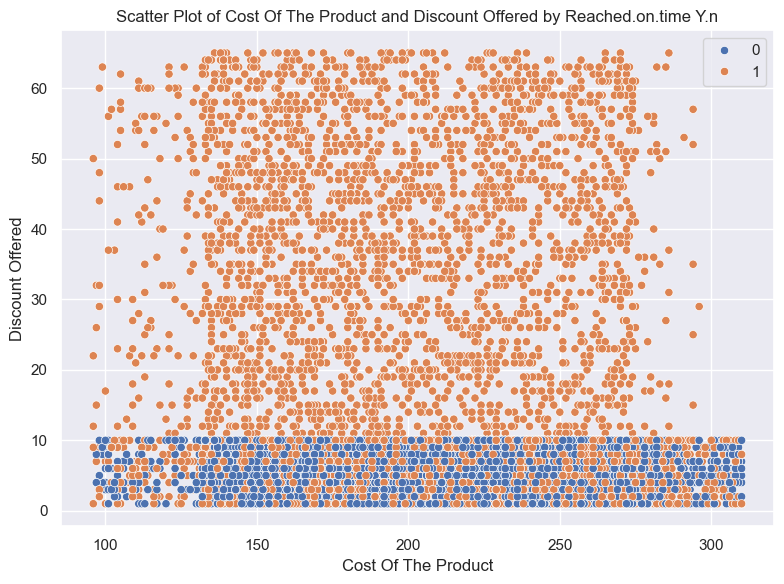

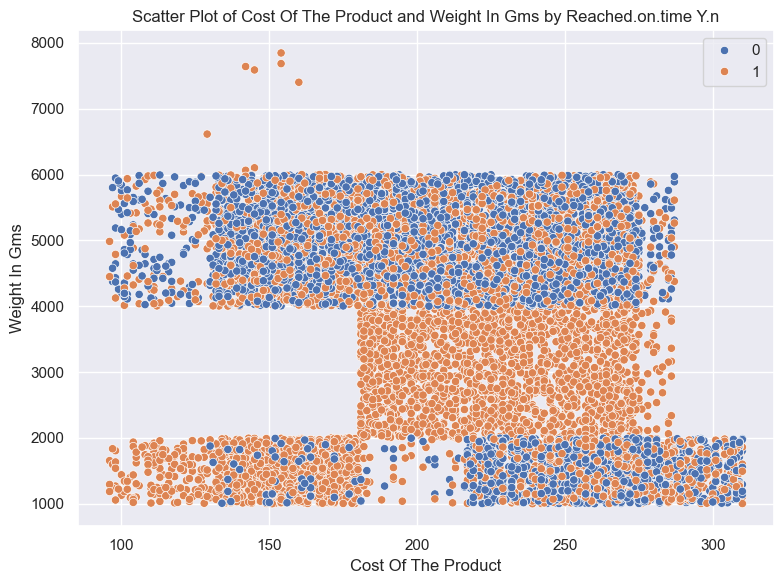

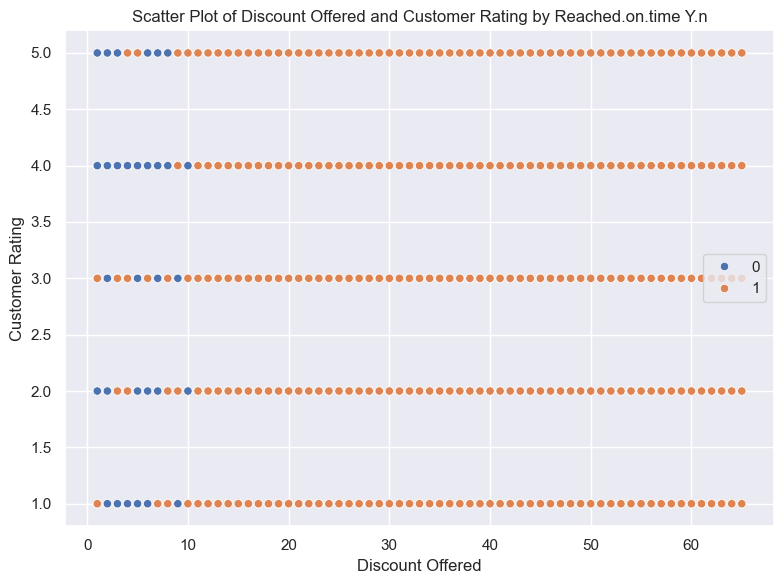

In [9]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {title(x)} and {title(y)} by {title(hue)}')
    plt.xlabel(title(x))
    plt.ylabel(title(y))
    plt.legend(title=None)

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="Cost_of_the_Product", y="Discount_offered", hue="Reached.on.Time_Y.N")
scatter_plot(data=df, x="Cost_of_the_Product", y="Weight_in_gms", hue="Reached.on.Time_Y.N")
scatter_plot(data=df, y="Customer_rating", x="Discount_offered", hue="Reached.on.Time_Y.N")

## Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product']
dum_cols = ['Warehouse_block', 'Mode_of_Shipment']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected column
df['Gender'] = le.fit_transform(df['Gender'])
df['Product_importance'] = df['Product_importance'].map({'high' : 9, 'medium':4, 'low':1})
# Apply get_dummies to the selected column
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [11]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Reached.on.Time_Y.N', 'ID', 'Gender'], axis=1)
y = df['Reached.on.Time_Y.N']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=42)

In [41]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [16]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.7174495861988577
Test accuracy: Gradient Boosting 0.684297520661157

Training accuracy: K-Nearest Neighbors 0.7696701247231612
Test accuracy: K-Nearest Neighbors 0.6409090909090909

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.6644628099173554

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.6471074380165289

Training accuracy: XGB Classifier 0.9122275323464273
Test accuracy: XGB Classifier 0.6611570247933884



In [19]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [4,8,12],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Initialize the Random Forest Classifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
rf_best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestClassifier(**rf_best_params)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [20]:
accuracy = accuracy_score(y_test, y_pred_best)

print(f'Best Parameters: {rf_best_params}')
print(f'R-squared (Tuned Random Forest): {round(accuracy, 3)}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
R-squared (Tuned Random Forest): 0.69


In [32]:
# Define the parameter grid to search
param_grid = { 
    'n_estimators': [210, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.0178],
    'subsample': [0.9],
    'colsample_bytree': [0.8, 0.80009, 0.79999],
}

# Initialize the XGB Classifier
xgb_best = XGBClassifier()
# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_best, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
xgb_best_params = grid_search.best_params_

# Retrain the model with the best parameters
xgb_model_best = XGBClassifier(**xgb_best_params)
xgb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = xgb_model_best.predict(x_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [33]:
accuracy = accuracy_score(y_test, y_pred_best)

print(f'Best Parameters: {xgb_best_params}')
print(f'R-squared (Tuned XGB): {round(accuracy, 3)}')

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.0178, 'max_depth': 3, 'n_estimators': 210, 'subsample': 0.9}
R-squared (Tuned Random Forest): 0.69


In [34]:
# Initialize the XGB Classifier
model1 = XGBClassifier(**xgb_best_params)
# Initialize the Random Forest Classifier
model2 = RandomForestClassifier( **rf_best_params)

# Create Ensemble Model
ensemble_model = VotingClassifier(estimators=[ ('xgb', model1), ('rf', model2)], voting='hard')

# Model Training
ensemble_model.fit(x_train, y_train)

# Predict y_test Values 
y_best_pred = ensemble_model.predict(x_test)

# Evaluate Model Accuracy 
accuracy = accuracy_score(y_test, y_best_pred)
print(f'Ensemble Model : Accuracy = {round(accuracy,3)}')


Ensemble Model : Accuracy = 0.691


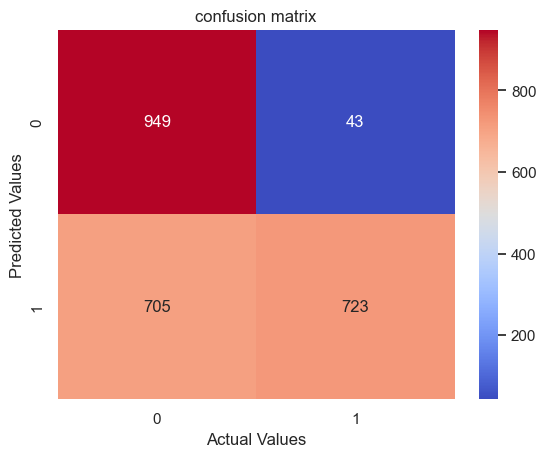

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,y_best_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()

In [37]:
# Visualize Classification report for Ensemble Model
print(classification_report(y_test,y_best_pred))

              precision    recall  f1-score   support

           0       0.57      0.96      0.72       992
           1       0.94      0.51      0.66      1428

    accuracy                           0.69      2420
   macro avg       0.76      0.73      0.69      2420
weighted avg       0.79      0.69      0.68      2420



### As we can see in the above cell , precision of our model in the '0' values of taget is too weak , so we gonna use of imblearn library for balancing values of target 

In [30]:
# redefine x and y
x = df.drop(['Reached.on.Time_Y.N', 'ID', 'Gender'], axis=1)
y = df['Reached.on.Time_Y.N']  # Target Variable

In [31]:
from imblearn.over_sampling import SMOTE

# Initialize Smote
smote = SMOTE(random_state=242)

# Apply Smote to the x and y 
x_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [32]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()


Training accuracy: Gradient Boosting 0.7446666666666667
Test accuracy: Gradient Boosting 0.7448591012947449

Training accuracy: K-Nearest Neighbors 0.7977142857142857
Test accuracy: K-Nearest Neighbors 0.7102056359482102

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.7440974866717441

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.7044935262757045

Training accuracy: XGB Classifier 0.9132380952380953
Test accuracy: XGB Classifier 0.7265803503427266



In [39]:
#Craete a Object of Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train and Evaluate the Model
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

accuracy = accuracy_score(y_test, gb_pred)
print(f'R-squared (Gradien Boosting Classifier): {round(accuracy, 3)}')

R-squared (Gradien Boosting Classifier): 0.745


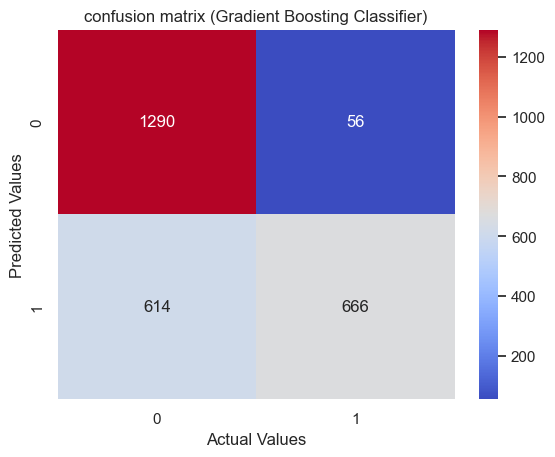

In [42]:
# Visualize confusion matrix for Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,gb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Gradient Boosting Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [43]:
# Visualize Classification report for Gradient Boosting Classifier
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79      1346
           1       0.92      0.52      0.67      1280

    accuracy                           0.74      2626
   macro avg       0.80      0.74      0.73      2626
weighted avg       0.80      0.74      0.73      2626



By employing the SMOTE method, the number of samples for minority classes has increased, leading to an enhancement in the predictive accuracy of the model. Rebalancing the model with new and balanced data has resulted in improved performance in predicting fraudulent warranty claims.

These findings demonstrate that utilizing class balancing techniques like SMOTE can significantly enhance the performance of fraud prediction models. Therefore, it is recommended to employ SMOTE and machine learning models trained using this method for analyzing and predicting warranty claims fraud, as it can lead to improved accuracy and predictive capability of the models.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com